In [ ]:
baseline_test_wer ={
    "aln": 0.741,
    "bew": 0.427,
    "bxk": 0.41,
    "cgg": 	0.44,
    "el-CY": 0.312,
    "hch": 	0.591,
    "kcn": 0.504,
    "koo": 0.61,
    "led": 0.362,
    "lke": 0.695,
    "lth": 	0.336,
    "meh": 0.408,
    "mmc": 0.625,
    "pne": 0.404,
    "ruc": 0.59,
    "rwm": 0.658,
    "sco": 0.377,
    "tob": 1.014,
    "top": 0.995,
    "ttj": 0.354,
    "ukv": 	0.467,
    "ady": 0.8,
    "bas": 0.644,
    "kbd": 0.669,
    "qxp": 0.31,
    "ush": 1.001
}

baseline_dev_wer ={
    "aln": 0.548,
    "bew": 0.5,
    "bxk": 0.513,
    "cgg": 	0.44,
    "el-CY": 0.433,
    "hch": 	0.67,
    "kcn": 0.526,
    "koo": 0.701,
    "led": 0.332,
    "lke": 0.553,
    "lth": 	0.37,
    "meh": 0.406,
    "mmc": 0.692,
    "pne": 0.358,
    "ruc": 0.602,
    "rwm": 0.695,
    "sco": 0.36,
    "tob": 1.026,
    "top": 0.996,
    "ttj": 0.27,
    "ukv": 	0.406,
    "ady": 0.8,
    "bas": 0.644,
    "kbd": 0.669,
    "qxp": 0.31,
    "ush": 1.001
}

In [ ]:
import pandas as pd
import json
import numpy as np
import os
model = "results/whisper-large-v3"
model = "results/whisper-tiny"
rows = []
summary_df = pd.read_csv(f"{model}/summary.csv")
for result in os.listdir(f"{model}/hyperparameters"):
    with open(f"{model}/hyperparameters/" + result, "r") as f:
        hyps = json.load(f)
        f.close()
    lang_name = result.split(".")[0]
    # if not any(item == lang_name for item in ["ush", "kbd", "ady", "qxp", "bas"]):
    if len(hyps) == 0:
        
        best_score = None#summary_df.loc[summary_df["language"] == lang_name].wer.item()
        best_lambda = None
        score_0 = summary_df.loc[summary_df["language"] == lang_name].wer.item()
    else:
        best_score = hyps[min(hyps, key=hyps.get)]
        best_lambda = min(hyps, key=hyps.get)
        score_0 = hyps["0.0"]

    rows.append([lang_name, best_score, score_0, baseline_dev_wer[lang_name],  
                best_lambda, best_score - score_0 if best_score is not None else None, best_score-baseline_dev_wer[lang_name]if best_score is not None else None])

df = pd.DataFrame(rows, columns=["lang", "wer", "wer_no_HR", "baseline", "best_lambda", "HR gains", "delta baseline"])
df['improved'] = np.where(df['wer'] < df['baseline'], True, False)

df.sort_values(by="lang")

,lang,wer,wer_no_HR,baseline,best_lambda,HR gains,delta baseline,improved
4,ady,0.820314,0.836154,0.800,0.0339807150839999,-0.015840,0.020314,False
5,aln,0.676001,0.706040,0.548,0.186598838781528,-0.030039,0.128001,False
18,bas,0.535971,0.546052,0.644,0.027306508272886276,-0.010081,-0.108029,True
1,bew,0.671015,0.707431,0.500,0.12266513664815333,-0.036415,0.171015,False
13,bxk,0.706453,0.771916,0.513,0.13320370149938981,-0.065463,0.193453,False
6,cgg,0.609177,0.692151,0.440,0.04913448914885521,-0.082974,0.169177,False
9,el-CY,0.757682,0.770213,0.433,0.05183022003620863,-0.012531,0.324682,False
3,hch,0.720801,0.760387,0.670,0.13616578049980527,-0.039586,0.050801,False
20,kbd,0.662104,0.676122,0.669,0.04774931858370779,-0.014018,-0.006896,True
22,kcn,0.667312,0.688862,0.526,0.11972325639951663,-0.021550,0.141312,False


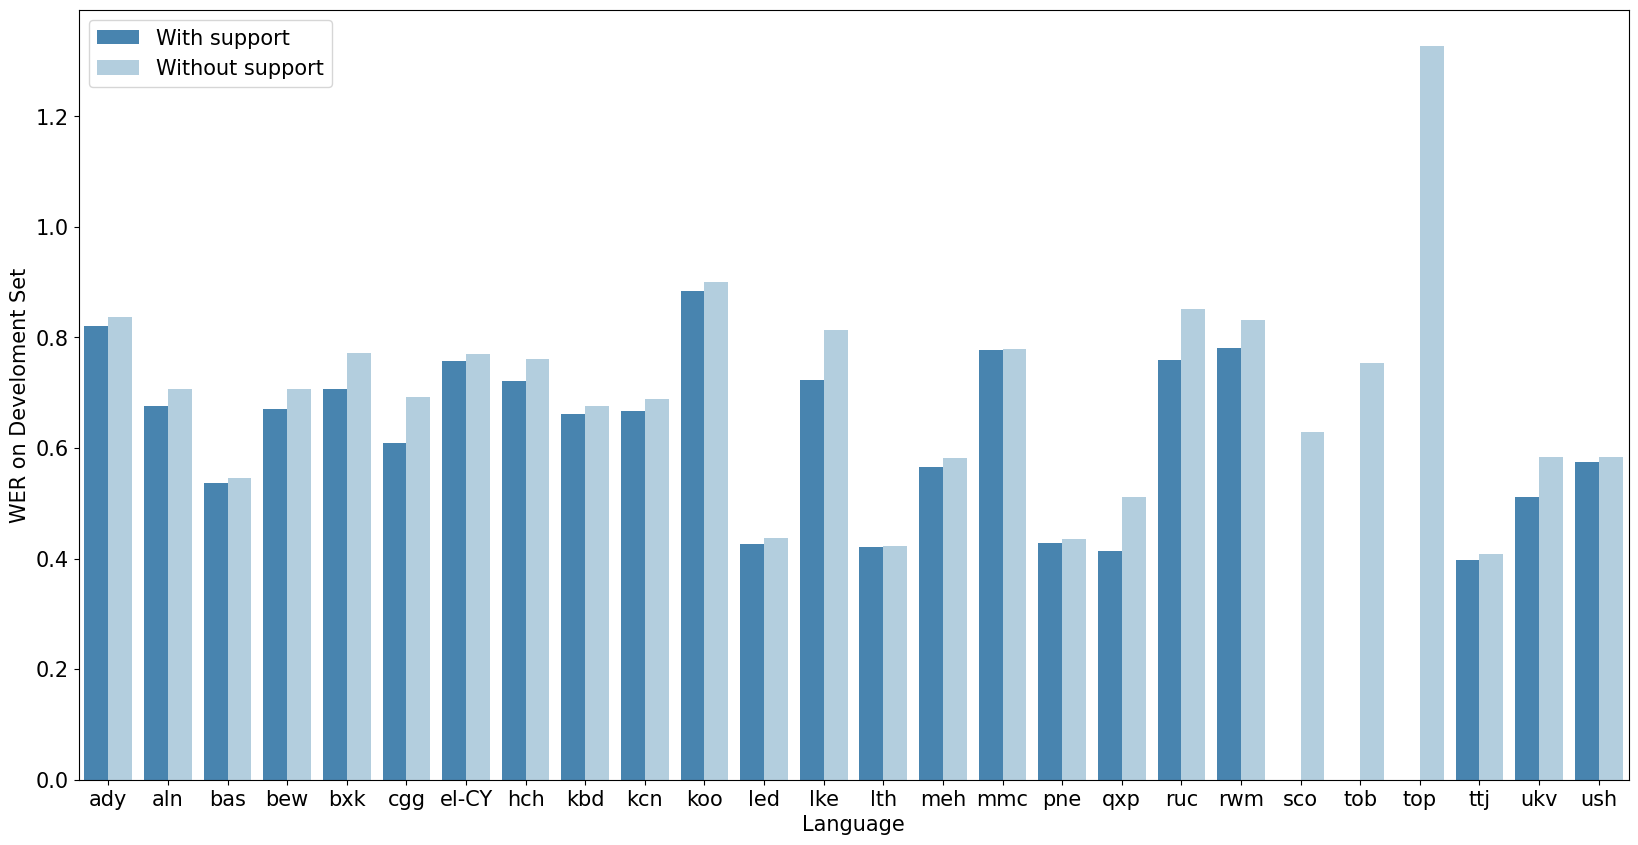

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 10))


df2 = df[["lang", "wer", "wer_no_HR"]]
# Create a mapping for the new labels
label_mapping = {"wer": "With support", "wer_no_HR": "Without support"}


df2.set_index('lang', inplace=True)
df2 = df2.sort_values(by="lang")
df2 = df2.stack().to_frame('value').reset_index()

df2.rename(columns={'level_1':'Item'},inplace=True)
# Apply the mapping to the 'smoker' column
df2['Item'] = df2['Item'].map(label_mapping)
ax = sns.barplot(data=df2, x='lang', y='value', hue='Item',palette="Blues_r")
ax.legend(loc='upper left', fontsize=15)
ax.set_xlabel("Language", fontsize=15)
ax.set_ylabel("WER on Develoment Set",  fontsize=15)
ax.tick_params(labelsize=15)


In [ ]:
df["baseline"].mean(), df["wer"].mean()

(0.5700384615384615, 0.6299643060947122)

In [ ]:
df["HR gains"].mean()

-0.03516636628558631